In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

from functions.plot_web_img import plot_web_img
from functions.processing_img import processing_img

In [2]:
webcam_path = 'data/webcam'
drawing_path = 'data/drawing'

webcam_pics = os.listdir(webcam_path)

# Associate the name of the image with the image itself
webcam_pics = {pic: plt.imread(os.path.join(webcam_path, pic)) for pic in webcam_pics}

# Save keys (without '.png' and '_') of the dictionary in a list named actual_digits
actual_digits = [pic.split('.')[0].split('_')[0] for pic in webcam_pics.keys()]

actual_digits

['0',
 '1',
 '2',
 '2',
 '3',
 '4',
 '4',
 '5',
 '5',
 '6',
 '6',
 '7',
 '8',
 '8',
 '8',
 '9']

In [3]:
processed_images = []
for image_file in os.listdir(webcam_path):
    full_path = os.path.join(webcam_path, image_file)
    processed_image = processing_img(full_path)
    processed_images.append(processed_image)

# processed_images = np.array(processed_images)
processed_images

[array([[0.39607843, 0.38431373, 0.38431373, ..., 0.50980392, 0.51372549,
         0.52941176],
        [0.38039216, 0.37254902, 0.37254902, ..., 0.49803922, 0.51764706,
         0.5254902 ],
        [0.38039216, 0.37254902, 0.37254902, ..., 0.49803922, 0.50980392,
         0.52156863],
        ...,
        [0.43921569, 0.43921569, 0.43529412, ..., 0.54117647, 0.54509804,
         0.56078431],
        [0.45490196, 0.45098039, 0.43529412, ..., 0.5372549 , 0.54509804,
         0.55294118],
        [0.45490196, 0.44705882, 0.45098039, ..., 0.5372549 , 0.54509804,
         0.54901961]]),
 array([[0.44705882, 0.43921569, 0.43137255, ..., 0.38823529, 0.4       ,
         0.40392157],
        [0.45098039, 0.43137255, 0.42745098, ..., 0.38039216, 0.38823529,
         0.4       ],
        [0.43921569, 0.43529412, 0.43529412, ..., 0.37254902, 0.38823529,
         0.39215686],
        ...,
        [0.53333333, 0.51372549, 0.50588235, ..., 0.47058824, 0.47843137,
         0.48235294],
        [0.5

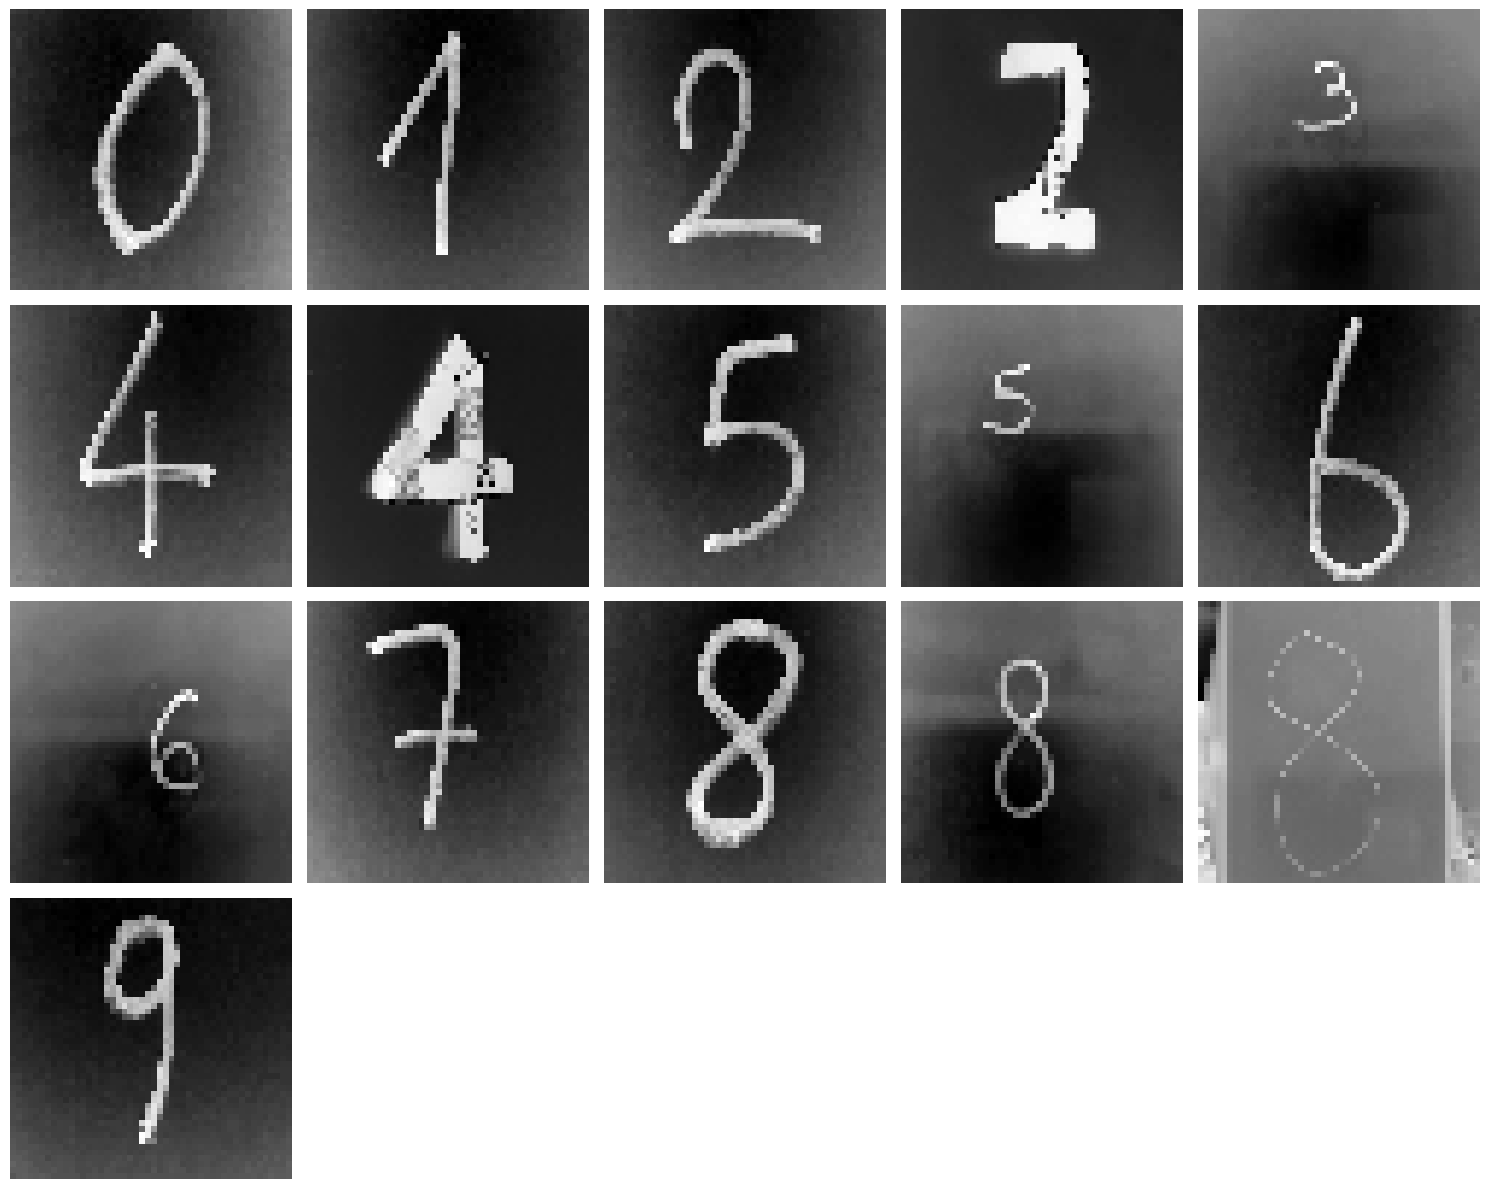

In [4]:
# Plot all images in the processed_images list using the plot_web_img function
plot_web_img(processed_images)

In [5]:
model = load_model('models\\number_recon_model.keras')

In [6]:
test_data = np.array(processed_images)

1/1 [==============================] - 0s 128ms/step


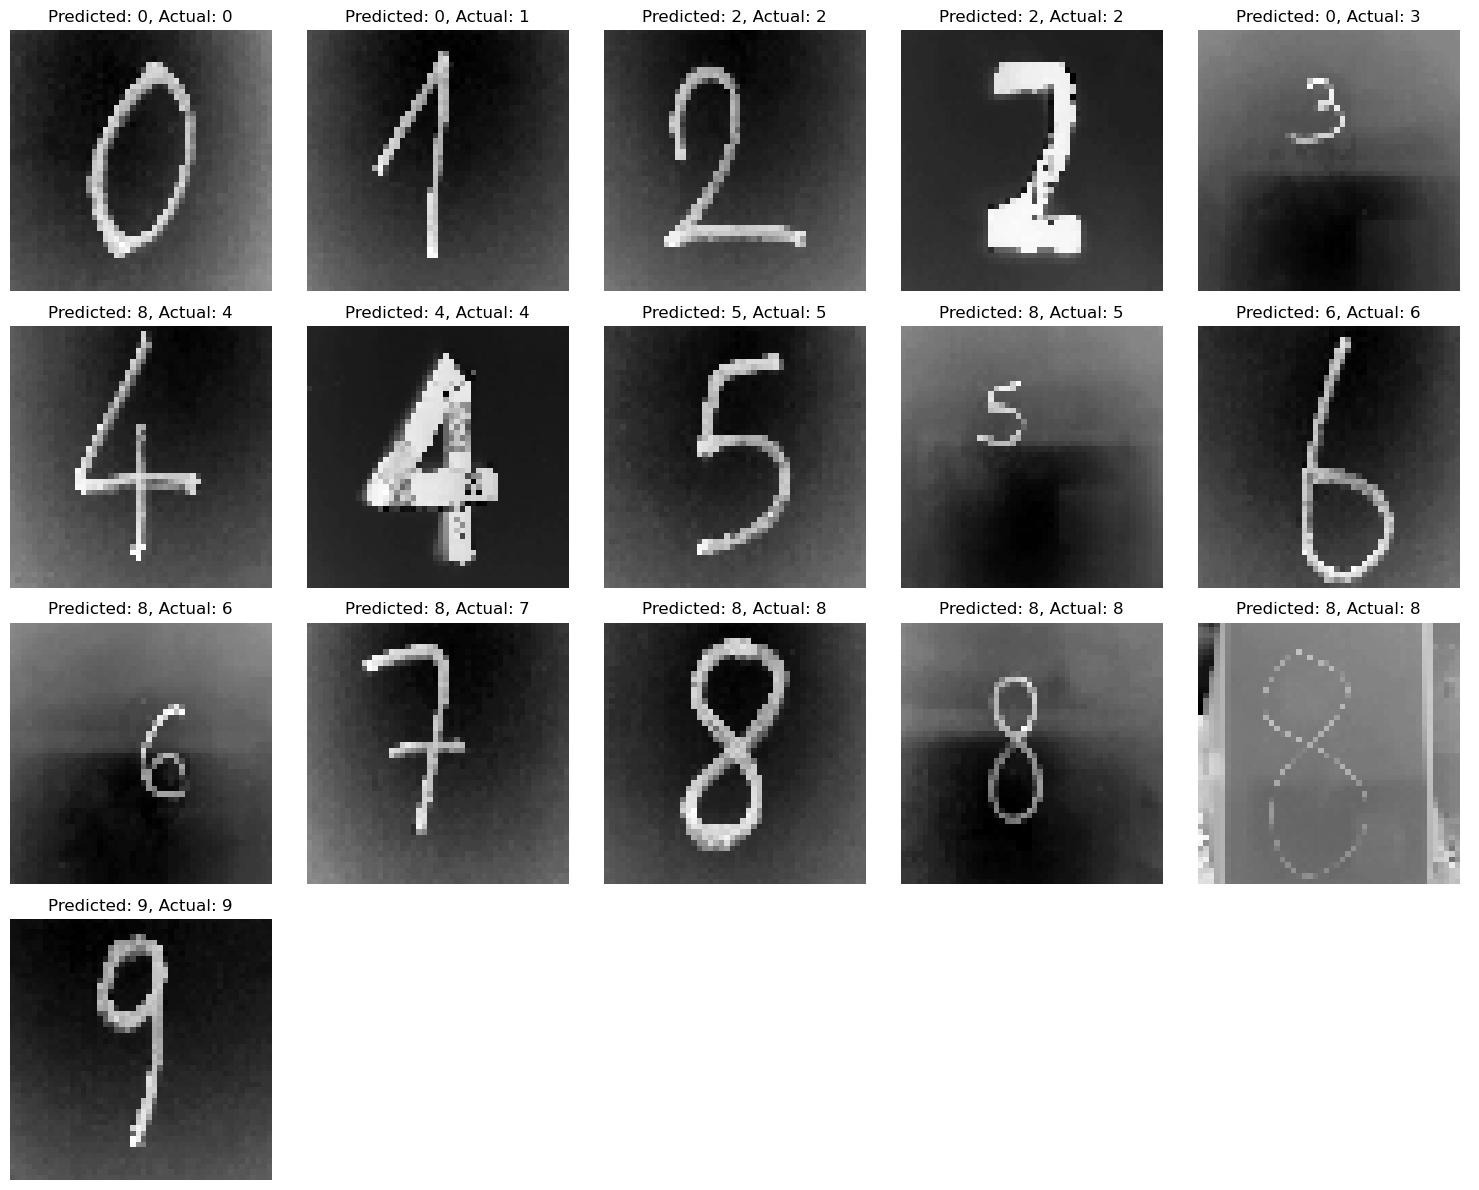

In [7]:
predictions = model.predict(test_data)

predicted_digits = np.argmax(predictions, axis=1)

num_images = len(test_data)
rows = int(np.ceil(num_images / 5.0))  # Use np.ceil to round up to the nearest whole number
fig, axes = plt.subplots(rows, 5, figsize=(15, rows*3))
axes = axes.ravel()  # Flatten the axes array

# Hide axes for unused subplots
for ax in axes[num_images:]:
    ax.axis('off')

for i, image in enumerate(test_data):
    axes[i].imshow(image, cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f"Predicted: {predicted_digits[i]}")
    axes[i].set_title(f"Predicted: {predicted_digits[i]}, Actual: {actual_digits[i]}")

plt.tight_layout()
plt.show()

In [8]:
# Caluculate accuracy
correct = 0
for i in range(len(predicted_digits)):
    if predicted_digits[i] == int(actual_digits[i]):
        correct += 1

accuracy = correct / len(predicted_digits)

print(f"Accuracy: {accuracy:.0%}")

Accuracy: 62%
